# Introduction


### Accessing the Data

In [228]:
# Includuing all additional imports
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
import numpy as np

train = pd.read_csv("https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv")
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10


*Including all additional imports*

## Exploring the Data
### Preliminary Visualizations


In [229]:
# Data modification
train_viz = train.copy()
loan_status_recode = {0: 'Paid in Full', 1: 'Defaulted'}
train_viz['loan_repayment'] = train_viz['loan_status'].map(loan_status_recode)
train_viz.loc[train_viz["person_age"] >= 100, "person_age"] = None
train_viz = train_viz.dropna()

# Subsetting data by loan status
default = train_viz[train_viz['loan_status'] == 1].copy().dropna()
repaid = train_viz[train_viz['loan_status'] == 0].copy().dropna()

*Modifying training data for visualization*

In [230]:
# Creating linear regression models and calculating R^2 values
## Default
c1 = np.polyfit(default['loan_amnt'], default['person_income'], 1)
p1 = np.polyval(c1, default['loan_amnt'])
r1 = default['person_income'] - p1
ssr1 = np.sum(r1**2)
sst1 = np.sum((default['person_income'] - np.mean(default['loan_amnt']))**2)
rs1 = 1 - (ssr1 / sst1)

## Repaid
c2 = np.polyfit(repaid['loan_amnt'], repaid['person_income'], 1)
p2 = np.polyval(c2, repaid['loan_amnt'])
r2 = repaid['person_income'] - p2
ssr2 = np.sum(r2**2)
sst2 = np.sum((repaid['person_income'] - np.mean(repaid['loan_amnt']))**2)
rs2 = 1 - (ssr2 / sst2)

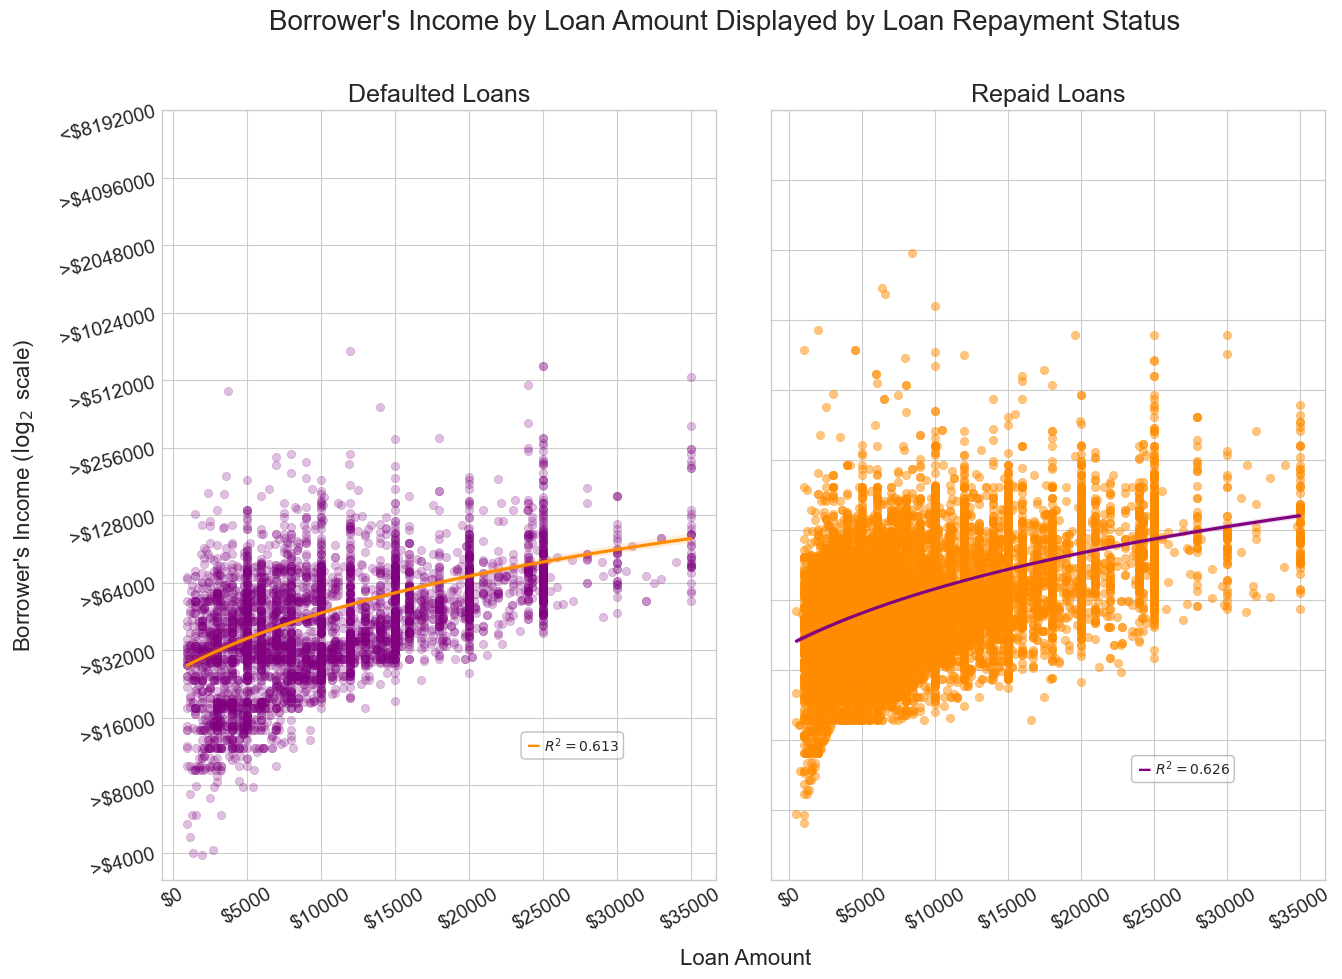

In [231]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Scatterplot and regression line for borrower income by loan amount of defaulted loans
ax[0] = sns.scatterplot(data = default, x = 'loan_amnt', y = 'person_income', color = 'purple', edgecolor = 'purple', alpha = 0.25, ax = ax[0])
sns.regplot(data = default, x = 'loan_amnt', y = 'person_income', scatter = False, line_kws={'color': 'darkorange'}, ax = ax[0])
ax[0].set_yscale('log', base = 2)
ax[0].set_xlabel('')
ax[0].set_xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
ax[0].set_xticklabels(['$0', '$5000', '$10000', '$15000', '$20000', '$25000', '$30000', '$35000'], rotation = 30, fontsize = 14)
ax[0].set_ylabel(f'Borrower\'s Income ($\log_2$ scale)', fontsize = 16, labelpad = 15)
ax[0].set_yticks([2**12, 2**13, 2**14, 2**15, 2**16, 2**17, 2**18, 2**19, 2**20, 2**21, 2**22, 2**23])
ax[0].set_yticklabels([">$4000", ">$8000", ">$16000", ">$32000", ">$64000", ">$128000", ">$256000", ">$512000", ">$1024000", ">$2048000", ">$4096000", "<$8192000"], rotation = 15, fontsize = 14)
ax[0].set_title('Defaulted Loans', fontsize = 18)
ax[0].text(27000, 12288, f'     $R^2 = {rs1:.3f}$', ha = 'center', va = 'center', fontsize = 10, 
        bbox = dict(facecolor = 'white', alpha = 0.5, edgecolor = 'gray', boxstyle = 'round,pad=0.3'))
ax[0].text(24000, 12288, '\u2013', color='darkorange', ha='left', va='center', fontsize=15, fontweight='bold')

# Scatterplot and regression line for borrower income by loan amount of repaid loans
ax[1] = sns.scatterplot(data = repaid, x = 'loan_amnt', y = 'person_income', color = 'darkorange', edgecolor = 'darkorange', alpha = 0.5, ax = ax[1])
sns.regplot(data = repaid, x = 'loan_amnt', y = 'person_income', scatter = False, line_kws={'color': 'purple'}, ax = ax[1])
ax[1].set_yscale('log', base = 2)
ax[1].set_xlabel('')
ax[1].set_xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
ax[1].set_xticklabels(['$0', '$5000', '$10000', '$15000', '$20000', '$25000', '$30000', '$35000'], rotation=30, fontsize = 14)
ax[1].set_ylabel('')
ax[1].set_yticks([2**12, 2**13, 2**14, 2**15, 2**16, 2**17, 2**18, 2**19, 2**20, 2**21, 2**22, 2**23])
ax[1].set_yticklabels(["", "", "", "", "", "", "", "", "", "", "", ""], rotation = 15)
ax[1].set_title('Repaid Loans', fontsize = 18)
ax[1].text(27000, 12288, f'     $R^2 = {rs2:.3f}$', ha = 'center', va = 'center', fontsize = 10, 
        bbox = dict(facecolor = 'white', alpha = 0.5, edgecolor = 'gray', boxstyle = 'round,pad=0.3'))
ax[1].text(24000, 12288, '\u2013', color='purple', ha='left', va='center', fontsize=15, fontweight='bold')

fig.suptitle('Borrower\'s Income by Loan Amount Displayed by Loan Repayment Status', fontsize = 20)
fig.text(0.47, 0.025, 'Loan Amount', fontsize = 16)
plt.subplots_adjust(wspace=0.1)

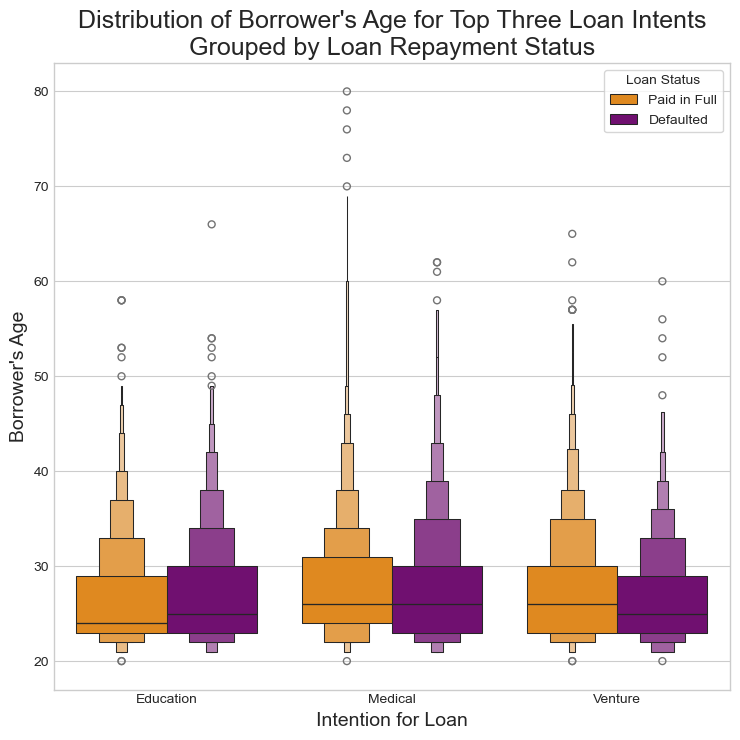

In [ ]:
# Subsetting data to the three most common loan intents
common_loan_intents = train_viz.copy()
common_loan_intents = train_viz[train_viz["loan_intent"].isin(["EDUCATION", "MEDICAL", "VENTURE"])].copy()
common_loan_intents.dropna()

# Creating Boxen Plot
fig, ax = plt.subplots(1, 1, figsize = (7.5, 7.5))
plt.style.use('seaborn-v0_8-whitegrid')

p = sns.boxenplot(common_loan_intents, x = "loan_intent", y = "person_age", hue = "loan_repayment", palette = ["darkorange", "purple"])
p.set_xlabel("Intention for Loan", fontsize = 14)
p.set_ylabel("Borrower\'s Age", fontsize = 14)
p.set_xticks(["EDUCATION", "MEDICAL", "VENTURE"])
p.set_xticklabels(["Education", "Medical", "Venture"])
p.legend(title = "Loan Status", frameon = True)
p.set_title("Distribution of Borrower\'s Age for Top Three Loan Intents\nGrouped by Loan Repayment Status", fontsize = 18)
plt.tight_layout()

*Code Description*

Analysis of the above figures.

### Table of General Summary Statistics

In [233]:
# Summary Statistics

# Helper method to calculate coefficient of variation (%)
def cv(col):
    return (col.std() / col.mean()) * 100

# Creating a table grouped by penguin species and sex, showing general summary stats for several quantitative variables
sum_stats = train_viz.rename(columns = {"loan_repayment": "Loan Repayment", "loan_amnt": "Loan Amount", "person_income": "Borrower\'s Income", "loan_intent": "Loan Intent", "person_age": "Borrower\'s Age", "loan_percent_income": "Loan Percent Income"}).copy()
sum_stats = sum_stats.groupby(["Loan Repayment", "Loan Intent"]).aggregate({"Loan Amount" : ["mean", "std", cv], 
                                                             "Borrower\'s Income" : ["mean", "std", cv], "Loan Percent Income": ["mean", "std", cv], 
                                                             "Borrower\'s Age": ["mean", "std", cv]})
sum_stats = sum_stats.rename(columns = {'mean': 'Mean', 'std': 'STD', 'cv': 'CV (%)'})
sum_stats = sum_stats.round(2)
sum_stats

Loan Amount                  \
                                        Mean      STD CV (%)   
Loan Repayment Loan Intent                                     
Defaulted      DEBTCONSOLIDATION    11283.45  7357.29  65.20   
               EDUCATION            10912.82  6979.08  63.95   
               HOMEIMPROVEMENT      10035.04  7324.85  72.99   
               MEDICAL              11438.49  7190.60  62.86   
               PERSONAL             10459.89  6884.86  65.82   
               VENTURE              11115.68  6695.34  60.23   
Paid in Full   DEBTCONSOLIDATION     9050.14  5810.33  64.20   
               EDUCATION             9206.44  6010.44  65.29   
               HOMEIMPROVEMENT      10518.51  6398.11  60.83   
               MEDICAL               8570.88  5645.54  65.87   
               PERSONAL              9441.60  6133.81  64.97   
               VENTURE               9307.47  6064.40  65.16   

                                 Borrower's Income                   \
                                              Mean       STD CV (%)   
Loan Repayment Loan Intent                                            
Defaulted      DEBTCONSOLIDATION          54553.15  37624.33  68.97   
               EDUCATION                  47283.67  30264.34  64.01   
               HOMEIMPROVEMENT            49794.13  33062.93  66.40   
               MEDICAL                    52477.12  44092.21  84.02   
               PERSONAL                   46965.14  39080.81  83.21   
               VENTURE                    44439.34  27743.83  62.43   
Paid in Full   DEBTCONSOLIDATION          72388.92  61644.36  85.16   
               EDUCATION                  67866.15  41045.51  60.48   
               HOMEIMPROVEMENT            82499.92  50452.00  61.15   
               MEDICAL                    65116.70  51476.94  79.05   
               PERSONAL                   72343.94  54121.45  74.81   
               VENTURE                    70493.68  58762.60  83.36   

                                 Loan Percent Income               \
                                                Mean   STD CV (%)   
Loan Repayment Loan Intent                                          
Defaulted      DEBTCONSOLIDATION                0.24  0.13  57.00   
               EDUCATION                        0.26  0.13  51.90   
               HOMEIMPROVEMENT                  0.22  0.13  57.24   
               MEDICAL                          0.24  0.13  54.74   
               PERSONAL                         0.25  0.13  51.99   
               VENTURE                          0.28  0.13  47.39   
Paid in Full   DEBTCONSOLIDATION                0.14  0.08  58.11   
               EDUCATION                        0.15  0.09  57.71   
               HOMEIMPROVEMENT                  0.14  0.09  61.15   
               MEDICAL                          0.15  0.08  56.46   
               PERSONAL                         0.15  0.09  57.83   
               VENTURE                          0.15  0.09  59.45   

                                 Borrower's Age               
                                           Mean   STD CV (%)  
Loan Repayment Loan Intent                                    
Defaulted      DEBTCONSOLIDATION          27.76  6.52  23.49  
               EDUCATION                  27.09  6.10  22.50  
               HOMEIMPROVEMENT            27.62  6.04  21.86  
               MEDICAL                    27.70  6.31  22.78  
               PERSONAL                   27.24  6.09  22.37  
               VENTURE                    26.74  5.45  20.38  
Paid in Full   DEBTCONSOLIDATION          27.54  5.66  20.56  
               EDUCATION                  26.43  5.49  20.79  
               HOMEIMPROVEMENT            29.47  5.48  18.60  
               MEDICAL                    27.96  6.17  22.07  
               PERSONAL                   28.49  7.42  26.03  
               VENTURE                    27.74  5.98  21.57

*In creating the table above, I looked up how to calculate the CV for each of the columns to more easily interpret the STD and created the helper method*

Analysis of the summary statistics table.

# Model Construction
## Feature Selection


In [248]:
# Splitting the training data
X = train.drop(["loan_status", "loan_grade"], axis = 1, errors = "ignore")
y = train["loan_status"]

## Creating one-hot encodings for qualitative variables
X = pd.get_dummies(X, drop_first = True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()

# Realigning dataset sizes
y_train = y_train.head(X_train.shape[0])
y_test = y_test.head(X_test.shape[0])

# Identifying quantitative and qualitative variables in the data
quant_vars = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
qual_vars = X_train.drop(quant_vars, axis = 1).columns

# Initial model
LR = LogisticRegression(random_state = 69)
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

/Users/colmcd/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7801124270043115

In [243]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
25751,25,51996,6.0,8000,10.37,0.15,2,False,False,False,True,False,False,False,True,False,False,True,False
6402,27,240000,1.0,35000,7.90,0.15,7,True,False,False,False,False,True,False,False,False,False,True,False
6433,43,90000,5.0,10400,11.49,0.12,14,False,False,False,True,True,False,False,False,False,False,True,False
13693,40,45600,20.0,7000,6.62,0.15,17,True,False,False,False,False,False,True,False,False,False,True,False
3115,24,44000,5.0,22800,17.27,0.52,3,True,False,False,False,True,False,False,False,False,False,True,False


*Code Description*

Analysis of feature selection.

## Creating a Scoring Function



*Code Description*

Analysis of creating scoring function.

## Choosing a Threshold

*Code Description*

Analysis of choosing a threshold.

# Model Evaluation
## Perspective of the Bank


*Code Description*

Analysis of model evaluation from the perspective of the bank.

## Perspective of the Borrower

*Code Description*

Analysis of model evaluation from the perspective of the borrower.

# Discussion


*During the implementation process of this blog post, I collaborated with __________*